Cosmology (compact) SS2020

# Exercise 5

## 1. Galaxies, redshift, and the distance-redshift relations

In [48]:
import astropy.constants as cst
import scipy.integrate as intg
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

h = 0.7
H0 = 100*h # km/s /Mpc
c_H0 = cst.c.value/((H0*u.km/u.Mpc).to(1).value)

def a(z):
    return 1/(1+z)

def E(z, dict):
    return np.sqrt(dict["Omega_r0"]*(1+z)**4+dict["Omega_m0"]*(1+z)**3+(1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"])*(1+z)**2+dict["Omega_L0"])

# Hubble factor
def H(z, dict):
    return H0*E(z,dict)
H_vectorized = np.vectorize(H)

# Density parameters
def Omega_m(z, dict):
    return dict["Omega_m0"]*(1+z)**3/E(z, dict)**2
def Omega_r(z, dict):
    return dict["Omega_r0"]*(1+z)**4/E(z, dict)**2
def Omega_L(z, dict):
    return dict["Omega_L0"]/E(z, dict)**2
def Omega_K(z, dict):
    Omega_K0 = 1-dict["Omega_m0"]-dict["Omega_L0"]-dict["Omega_r0"]
    return Omega_K0*(1+z)**2/E(z, dict)**2

# distances
def D_com_integrand(x, dict):
    return 1/E(x, dict)
def D_com(z, dict):
    return intg.quad(D_com_integrand, 0, z, args=(dict,))[0]
D_com_vectorized = np.vectorize(D_com)
def D_phy(z, dict):
    return D_com(z, dict)/(1+z)
D_phy_vectorized = np.vectorize(D_phy)

# formula from Extragalactic Astronomy and Cosmology [Peter Schneider] P159, also see https://arxiv.org/pdf/astro-ph/9905116.pdf
def D_M(z, dict): 
    x = D_com_vectorized(z, dict)
    Omega_K0 = 1-dict["Omega_r0"]-dict["Omega_m0"]-dict["Omega_L0"]
    if Omega_K0 > 0:
        return np.sinh(np.sqrt(Omega_K0)*x)/np.sqrt(Omega_K0)
    if Omega_K0 < 0:
        return np.sin(np.sqrt(-Omega_K0)*x)/np.sqrt(-Omega_K0)
    return x
D_M_vectorized = np.vectorize(D_M)
def D_ang(z, dict):
    return D_M_vectorized(z, dict)/(1+z)
D_ang_vectorized = np.vectorize(D_ang)

def flux(z, dict):
    D_L = (1+z)**2 * D_ang(z, dict)
    return 1/(D_L**2 * 4 * np.pi)
flux_vectorized = np.vectorize(flux)

Define cosmological parameters for different cosmological scenario.

In [2]:
EdS = {"Omega_m0": 1, "Omega_L0": 0, "Omega_r0": 0}
dS = {"Omega_m0": 0, "Omega_L0": 1, "Omega_r0": 0}
LCDM = {"Omega_m0": 0.315, "Omega_L0": 0.685, "Omega_r0": 2.47*10**(-5)*(H0/100)**(-2)}

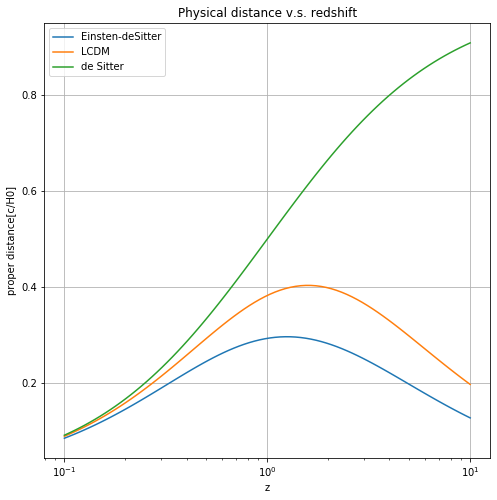

In [3]:
z = np.logspace(-1,  1, num=80)
plt.figure(figsize = [8, 8])
plt.plot(z, D_phy_vectorized(z,EdS), label = "Einsten-deSitter")
plt.plot(z, D_phy_vectorized(z,LCDM), label = "LCDM")
plt.plot(z, D_phy_vectorized(z,dS), label = "de Sitter")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("proper distance[c/H0]")
plt.title("Physical distance v.s. redshift")
plt.grid()
plt.show()

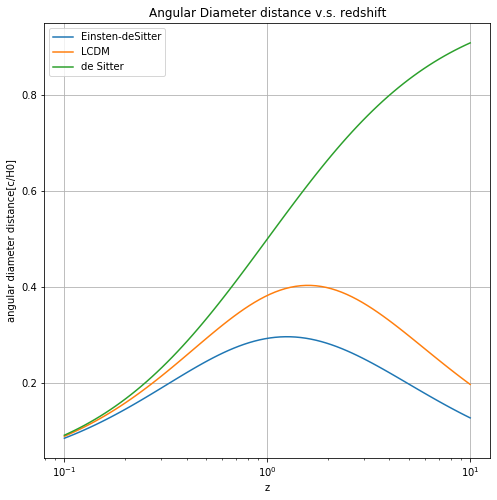

In [20]:
z = np.logspace(-1,  1, num=80)
plt.figure(figsize = [8, 8])
plt.plot(z, D_ang_vectorized(z,EdS), label = "Einsten-deSitter")
plt.plot(z, D_ang_vectorized(z,LCDM), label = "LCDM")
plt.plot(z, D_ang_vectorized(z,dS), label = "de Sitter")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("angular diameter distance[c/H0]")
plt.title("Angular Diameter distance v.s. redshift")
plt.grid()
plt.show()

In our case the angular diameter distance is the same as the proper distance. That is because the curvature of the 3 cosmological models we plotted are all flat Universes so that the curvature parameter has no influence in the angular diameter distance. 

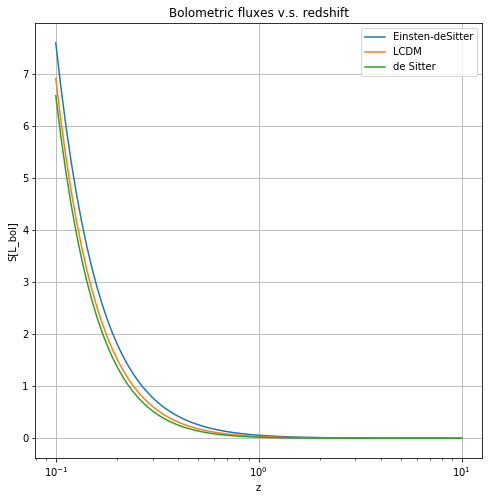

In [21]:
z = np.logspace(-1,  1, num=80)
plt.figure(figsize = [8, 8])
plt.plot(z, flux_vectorized(z,EdS), label = "Einsten-deSitter")
plt.plot(z, flux_vectorized(z,LCDM), label = "LCDM")
plt.plot(z, flux_vectorized(z,dS), label = "de Sitter")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("S[L_bol]")
plt.title("Bolometric fluxes v.s. redshift")
plt.grid()
plt.show()

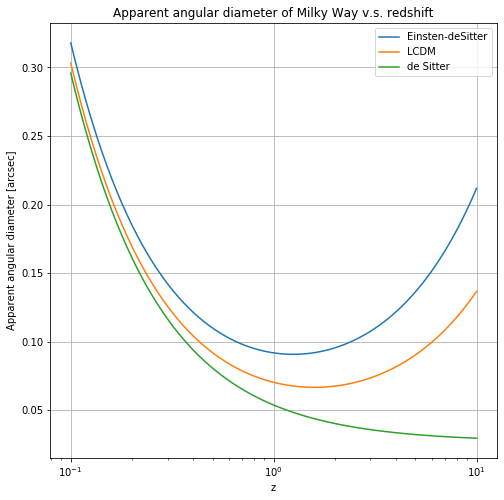

In [41]:
def appAngDiam(R, z, dict):
    return R/(D_ang(z,dict)*c_H0)
appAngDiam_vectorized = np.vectorize(appAngDiam)

z = np.logspace(-1,  1, num=80)
plt.figure(figsize = [8, 8])
R_MW = (16*u.kpc).to(u.m).value
plt.plot(z, appAngDiam_vectorized(R_MW*2, z, EdS)*3600, label = "Einsten-deSitter")
plt.plot(z, appAngDiam_vectorized(R_MW*2, z, LCDM)*3600, label = "LCDM")
plt.plot(z, appAngDiam_vectorized(R_MW*2, z, dS)*3600, label = "de Sitter")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("z")
plt.ylabel("Apparent angular diameter [arcsec]")
plt.title("Apparent angular diameter of Milky Way v.s. redshift")
plt.grid()
plt.show()

In [39]:
zs = [0.1, 1, 3, 6]
print("In an Einstein-de Sitter universe, the apparent angular diamter and bolometric flux of the Milky Way is, respectively:")
for rs in zs:
    print("z = %.1f: %.2f arcsec, %.4f L_bol"%(rs, appAngDiam(R_MW*2, rs, EdS)*3600, flux(rs,EdS)))
print("In a de Sitter universe, the apparent angular diamter and bolometric flux of the Milky Way is, respectively:")
for rs in zs:
    print("z = %.1f: %.2f arcsec, %.4f L_bol"%(rs, appAngDiam(R_MW*2, rs, dS)*3600, flux(rs,dS)))
print("In a LCDM universe, the apparent angular diamter and bolometric flux of the Milky Way is, respectively:")
for rs in zs:
    print("z = %.1f: %.2f arcsec, %.4f L_bol"%(rs, appAngDiam(R_MW*2, rs, LCDM)*3600, flux(rs,LCDM)))

In an Einstein-de Sitter universe, the apparent angular diamter and bolometric flux of the Milky Way is, respectively:
z = 0.1: 0.32 arcsec, 7.5917 L_bol
z = 1.0: 0.09 arcsec, 0.0580 L_bol
z = 3.0: 0.11 arcsec, 0.0050 L_bol
z = 6.0: 0.15 arcsec, 0.0010 L_bol
In a de Sitter universe, the apparent angular diamter and bolometric flux of the Milky Way is, respectively:
z = 0.1: 0.30 arcsec, 6.5767 L_bol
z = 1.0: 0.05 arcsec, 0.0199 L_bol
z = 3.0: 0.04 arcsec, 0.0006 L_bol
z = 6.0: 0.03 arcsec, 0.0000 L_bol
In a LCDM universe, the apparent angular diamter and bolometric flux of the Milky Way is, respectively:
z = 0.1: 0.30 arcsec, 6.9044 L_bol
z = 1.0: 0.07 arcsec, 0.0340 L_bol
z = 3.0: 0.07 arcsec, 0.0023 L_bol
z = 6.0: 0.10 arcsec, 0.0005 L_bol


Here it's interesting to see that the apparent angular diamter of the Milky Way is not a monotonic function of time in the case of Einstein-de Sitter Universe, as well as in a LCDM Universe. That is due to the evolution of angular diamter distance with time.

## 2. The Horizon Size

Estimate the angle $\theta_H$ subtended by a region whose transverse length is equal to the size of particle horizon at z ~ 1000. 

In [49]:
print("The particle horizon at z ~ 1100 is the proper distance the light traverses %.2E m."%(D_phy(1100, LCDM)*c_H0))

The particle horizon at z ~ 1100 is the proper distance the light traverses 3.75E+23 m.


In [53]:
D_A = D_ang(1100, LCDM)
print("The angle theta_h subtended by a region whose transverse length equals to this size is about %.2f degree."%(D_phy(1100, LCDM)/D_A))

The angle theta_h subtended by a region whose transverse length equals to this size is about 1.00 degree.


If we were able to measure $\theta_H$, which is basically the ratio between the line-of-sight comoving ditance and the transverse comoving distance, so that we could contrain the spatial curvature parameter.